In [ ]:
!pip install kaggle
from google.colab import files

print("Upload kaggle.json")
uploaded = files.upload()


Upload kaggle.json


Saving kaggle.json to kaggle (1).json


In [ ]:
import os

for root, dirs, files in os.walk("plant_village", topdown=True):
    print(root, dirs)
    break


plant_village ['PlantVillage', 'plantvillage']


In [ ]:
os.listdir("plant_village/PlantVillage")
os.listdir("plant_village/plantvillage")


['PlantVillage']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import random


In [ ]:
train_path = "plant_village/PlantVillage"   # ✔ Your exact folder
print("Classes found:", os.listdir(train_path))


Classes found: ['Tomato_Septoria_leaf_spot', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___healthy', 'Pepper__bell___Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Tomato_Leaf_Mold', 'Potato___Late_blight', 'Potato___healthy', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Target_Spot', 'Potato___Early_blight']


In [ ]:
IMG_SIZE = 224
BATCH = 32

datagen = ImageDataGenerator(
    rescale=1/255.,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2
)


train_gen = datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = train_gen.num_classes
num_classes


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


15

In [ ]:
base = tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │        19,215 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,277,199 (8.69 MB)

 Trainable params: 19,215 (75.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 288s 523ms/step - accuracy: 0.5907 - loss: 1.3250 - val_accuracy: 0.8382 - val_loss: 0.5023
Epoch 2/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 244s 471ms/step - accuracy: 0.8345 - loss: 0.5156 - val_accuracy: 0.8615 - val_loss: 0.4188
Epoch 3/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 243s 470ms/step - accuracy: 0.8598 - loss: 0.4302 - val_accuracy: 0.8785 - val_loss: 0.3854
Epoch 4/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 244s 472ms/step - accuracy: 0.8681 - loss: 0.3972 - val_accuracy: 0.8848 - val_loss: 0.3333
Epoch 5/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 242s 467ms/step - accuracy: 0.8762 - loss: 0.3710 - val_accuracy: 0.8920 - val_loss: 0.3184


In [ ]:
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

Final Training Accuracy: 0.8781
Final Validation Accuracy: 0.8920


In [ ]:
# STEP 3: Fine-tuning

# Unfreeze the base model
base.trainable = True

# Freeze first 100 layers
for layer in base.layers[:100]:
    layer.trainable = False

# Recompile with low learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
fine_tune_history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


Epoch 1/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 287s 512ms/step - accuracy: 0.6197 - loss: 1.6466 - val_accuracy: 0.8843 - val_loss: 0.3461
Epoch 2/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 243s 470ms/step - accuracy: 0.8456 - loss: 0.4631 - val_accuracy: 0.8826 - val_loss: 0.3554
Epoch 3/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 241s 467ms/step - accuracy: 0.8802 - loss: 0.3493 - val_accuracy: 0.9051 - val_loss: 0.2762
Epoch 4/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 242s 468ms/step - accuracy: 0.8993 - loss: 0.2868 - val_accuracy: 0.9129 - val_loss: 0.2512
Epoch 5/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 242s 469ms/step - accuracy: 0.9100 - loss: 0.2565 - val_accuracy: 0.9226 - val_loss: 0.2211


In [ ]:
# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(val_gen)

print(f"Validation Loss after Fine-tuning: {val_loss:.4f}")
print(f"Validation Accuracy after Fine-tuning: {val_accuracy*100:.2f}%")


129/129 ━━━━━━━━━━━━━━━━━━━━ 48s 368ms/step - accuracy: 0.9319 - loss: 0.1976
Validation Loss after Fine-tuning: 0.2260
Validation Accuracy after Fine-tuning: 92.48%


In [ ]:
print("Before Fine-tuning Accuracy:", history.history['val_accuracy'][-1]*100)
print("After Fine-tuning Accuracy:", val_accuracy*100)


Before Fine-tuning Accuracy: 89.20426964759827
After Fine-tuning Accuracy: 92.47937798500061


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


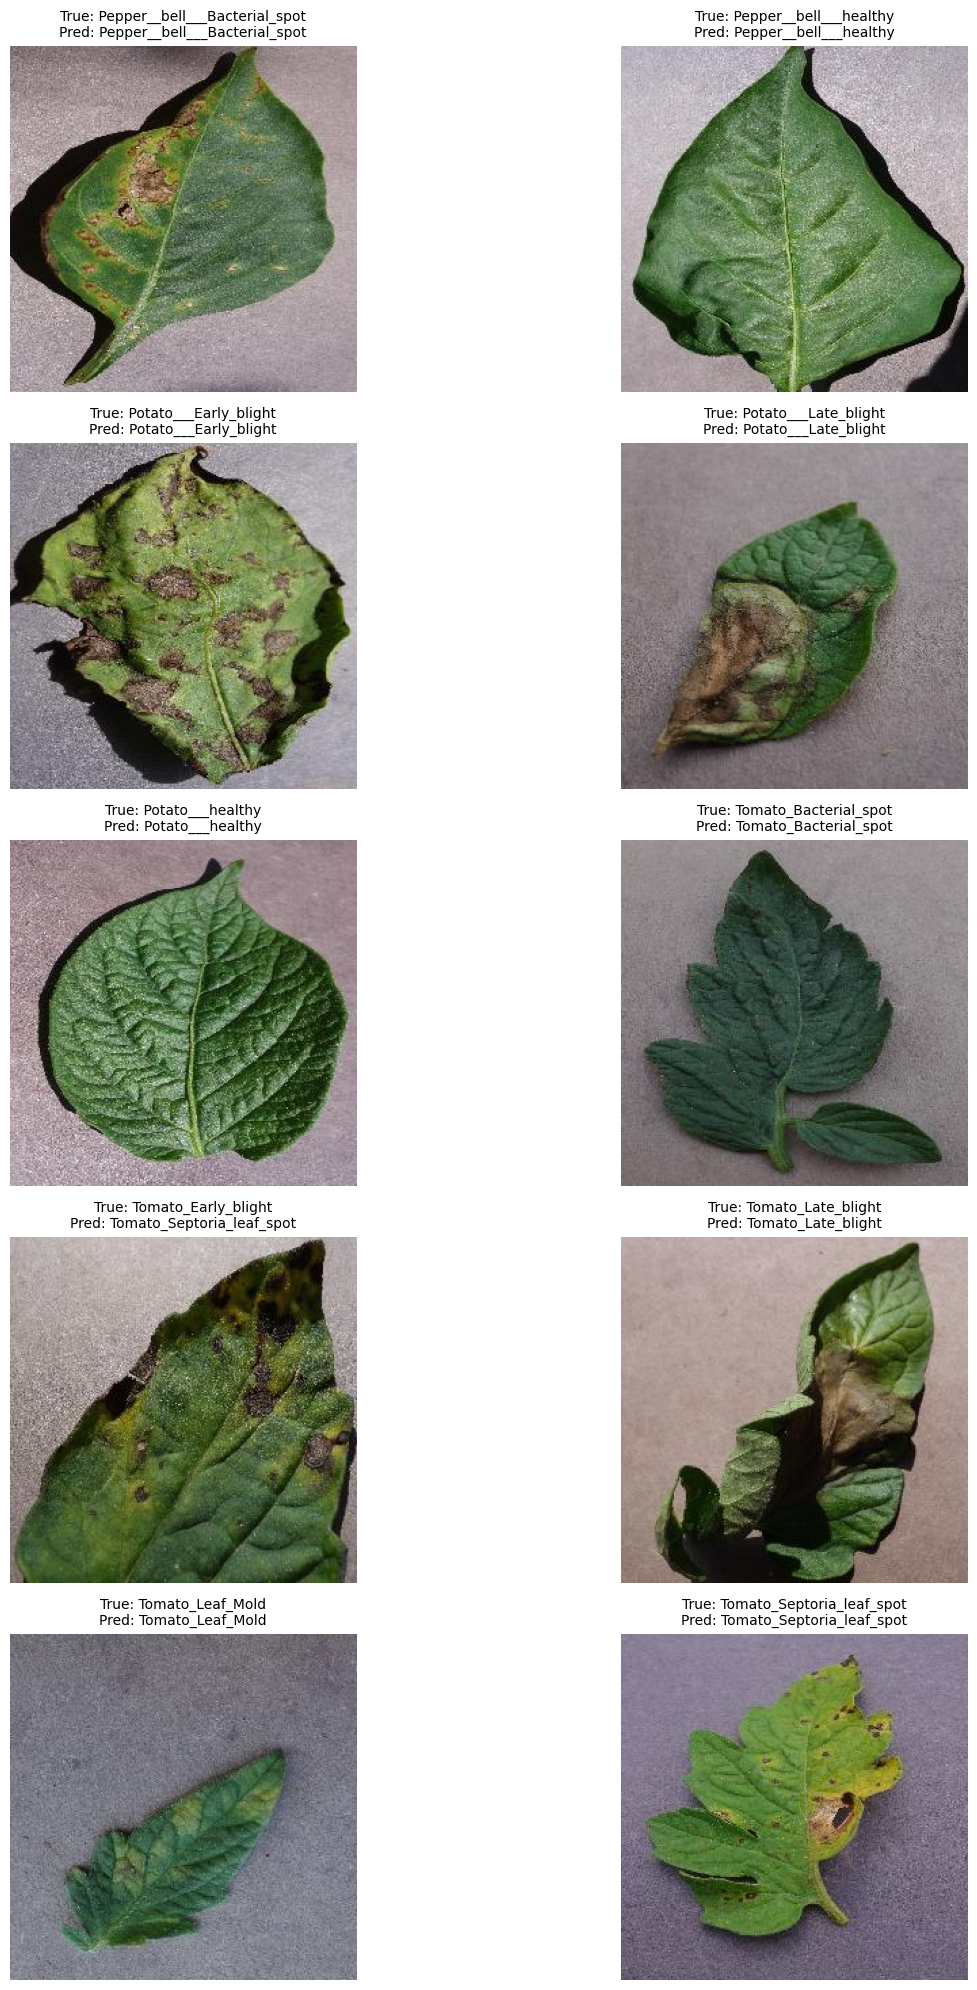

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class_names = list(train_gen.class_indices.keys())

plt.figure(figsize=(15, 20))
plot_index = 1

for class_id, class_name in enumerate(class_names[:10]):  # test first 10 classes
    # find one image of this class in validation set
    idx = np.where(val_gen.classes == class_id)[0][0]

    img = val_gen.filepaths[idx]
    image = plt.imread(img)

    img_resized = tf.keras.preprocessing.image.load_img(
        img, target_size=(IMG_SIZE, IMG_SIZE)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    pred = model.predict(img_array)
    pred_class = np.argmax(pred)

    plt.subplot(5, 2, plot_index)
    plt.imshow(image)
    plt.axis("off")
    plt.title(
        f"True: {class_name}\n"
        f"Pred: {class_names[pred_class]}",
        fontsize=10
    )
    plot_index += 1

plt.tight_layout()
plt.show()


In [ ]:
model.save("plant_disease_finetuned.h5")

In [ ]:
from google.colab import files
files.download("plant_disease_finetuned.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
class_names = list(train_gen.class_indices.keys())

import json
with open("class_names.json", "w") as f:
    json.dump(class_names, f)


In [ ]:
from google.colab import files
files.download("class_names.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>